In [1]:
from Game import *

Version:  0.3.02


Four functions to do:

1. `initial_state()`   return the state for the start of the game
2. `valid_moves(state,player)` return a list of valid moves
3. `update_state(state, player, move )` return the new state
4. `win_status(new_state,player)` returns one of `"win"`,`"lose"`,`"stalemate"` or `None`

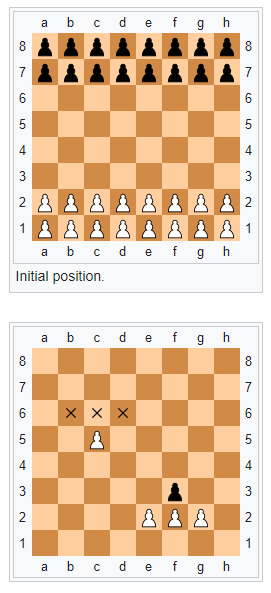

In [2]:
def initial_state():
    state=Board(5,5)
    
    row=0
    for col in range(5):
        state[row, col] = 1
        
    row=4
    for col in range(5):
        state[row, col] = 2
    
    return state

In [3]:
def valid_moves(state, player):
    moves=[]
    player1Column1down=[0,5,10,15]
    player2Column1up=[5,10,15,20]
    player1Column5down=[4,9,14,19]
    player2Column5up=[9,14,19,24]

    # Player 1 valid forward moves
    if player==1:
        for location in range(20):
            if state[location]==1:
                newLocation=location+5
                if newLocation<len(state) and state[newLocation]==0:
                    moves.append((location,newLocation))

    # Player 2 valid forward moves
    if player==2:
        for location in range(5, 25):
            if state[location]==2:
                newLocation=location-5
                if newLocation>=0 and state[newLocation]==0:
                    moves.append((location,newLocation))
                
    # Player 1 valid diagonal moves right
    if player==1:
        for location in range(20):
            if state[location]==1:
                if location%5==4:
                    continue
                newLocation=location+6
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                
    # Player 1 valid diagonal moves left
    if player==1:
        for location in range(5,25):
            if state[location]==1:
                if location%5==0:
                    continue
                newLocation=location+4
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                    
    # Player 1 valid diagonal moves down column 1 (0 index)
    if player==1:
        for location in player1Column1down:
            if state[location]==1:
                newLocation=location+6
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                    
    # Player 1 valid diagonal moves down column 5 (4 index)
    if player==1:
        for location in player1Column5down:
            if state[location]==1:
                newLocation=location+4
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                
    # Player 2 valid diagonal moves right
    if player==2:
        for location in range(20):
            if state[location]==2:
                if location%5==4:
                    continue
                newLocation=location-6
                if newLocation>=0 and state[newLocation]==1:
                    moves.append((location,newLocation))
                
    # Player 2 valid diagonal moves left
    if player==2:
        for location in range(20):
            if state[location]==2:
                if location%5==0:
                    continue
                newLocation=location-4
                if newLocation>=0 and state[newLocation]==1:
                    moves.append((location,newLocation))
                    
    # Player 2 valid diagonal moves up column 1 (0 index)
    if player==2:
        for location in player2Column1up:
            if state[location]==2:
                newLocation=location-4
                if newLocation<len(state) and state[newLocation]==1:
                    moves.append((location,newLocation))
                    
    # Player 2 valid diagonal moves up column 5 (4 index)
    if player==2:
        for location in player2Column5up:
            if state[location]==2:
                newLocation=location-6
                if newLocation<len(state) and state[newLocation]==1:
                    moves.append((location,newLocation))

                    
    moves=[ [start,end] for start,end in moves]
                    
    return moves       

In [4]:
def update_state(state,player,move):
    start,end=move
    newState=state
    newState[start]=0
    newState[end]=player
    
    return newState

In [5]:
def win_status(state,player):
    # Win by reaching opposing players start row
    for col in range(5):
        if state[4, col]==1:
            return "win"
            
    for col in range(5):
        if state[0, col]==2:
            return "win"

    # Win by blocking and win by eliminating all opposing players' pieces
    if player==1 and not valid_moves(state,2):
        return "win"
    
    if player==2 and not valid_moves(state,1):
        return "win"

    return None


In [6]:
def human_move(state,player):
    
    while True:
        moves=eval(input("Enter your move"))

        if moves not in valid_moves(state,player):
            print("That is not a valid move")
        else:
            break
    
    return moves

human_agent=Agent(human_move)

In [7]:
def show_state(state,player):
    print(state)

In [8]:
def monkey_move(state,player):
    return random.choice(valid_moves(state,player))
monkey_agent=Agent(monkey_move)
random_move=monkey_move

Minimax Agent

In [9]:
from Game.minimax import *

In [10]:
def minimax_move(state,player):
    values,actions=minimax_values(state,player,display=True)
    return top_choice(actions,values)
minimax_agent=Agent(minimax_move)

In [ ]:
g=Game()
g.display=False
g.run(monkey_agent,minimax_agent)

Q Agent

In [11]:
def Q_move(state,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ
    
    if state not in Q:
        actions=valid_moves(state,player)
        Q[state]=Table()
        for action in actions:
            Q[state][action]=0  # initial value of table
    
    if learning:
        if random.random()<ϵ:  # take a random move occasionally to explore the environment
            move=random_move(state,player)
        else:
            move=top_choice(Q[state])
    else:
        move=top_choice(Q[state])
    
    if not last_action is None:  # not the first move
        reward=0
        
        # learn
        if learning:
            Q[last_state][last_action]+=α*(reward +
                        γ*max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])
    
    return move

In [12]:
def Q_after(status,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ

    if status=='lose':
        reward=-1
    elif status=='win':
        reward=1
    elif status=='stalemate':
        reward=.5 # value stalemate a little closer to a win
    else:
        reward=0
    
    
    if learning:
        Q[last_state][last_action]+=α*(reward - Q[last_state][last_action])
        

Q Agent Training

In [13]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.8  # learning rate
Q1_agent.ϵ=0.5  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [14]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.8  # learning rate
Q2_agent.ϵ=0.5  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [15]:
N_test=1000
N_train=1000

In [16]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title
from tqdm.notebook import tqdm

In [17]:
agent1=Q1_agent
agent1.Q=Table()
agent2=Q2_agent
agent2.Q=Table()

In [18]:
S=Storage()
one,two,ties,N=0,0,0,0

In [19]:
for i in tqdm(range(25000)):
    Q1_agent.learning=True
    Q2_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    result=g.run(agent1,agent2)

    
    Q1_agent.learning=False
    Q2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    result=g.run(agent1,agent2)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N


  0%|          | 0/25000 [00:00<?, ?it/s]

In [20]:
y1,y2,y0,x=S.arrays()

Text(0, 0.5, 'Percent')

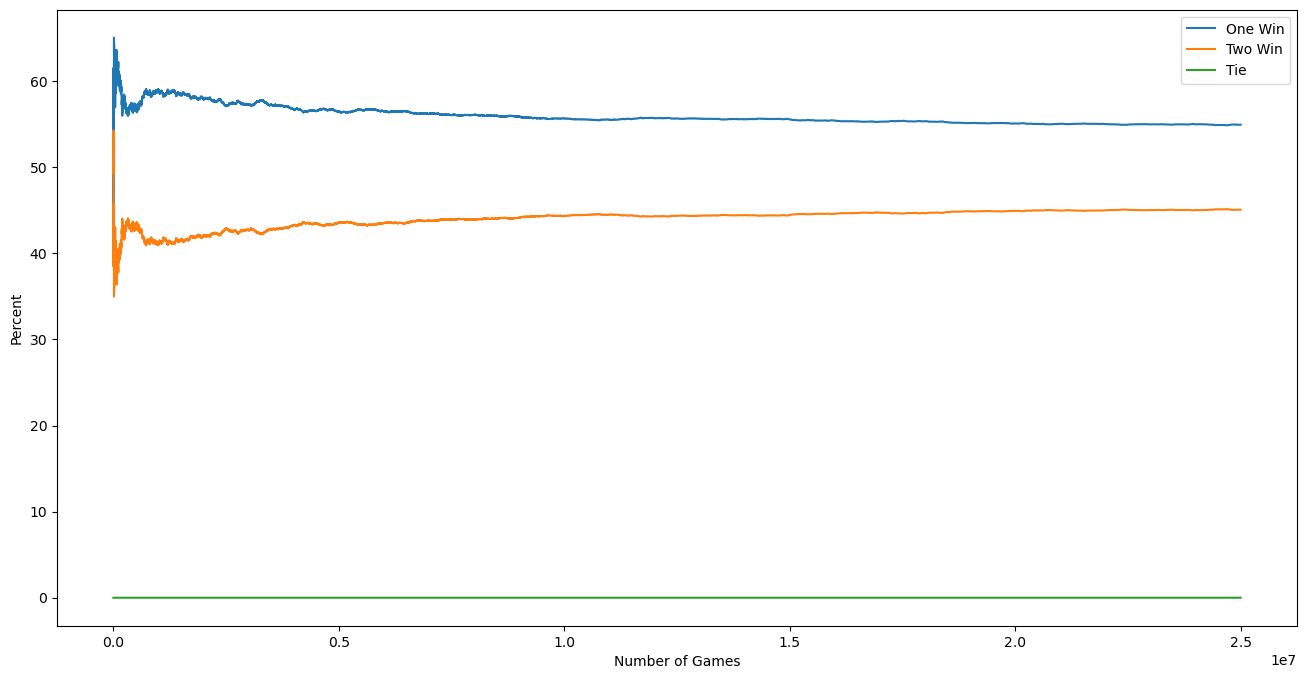

In [21]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')

Q Agent SaveTable

In [22]:
import os

os.getcwd()
# Make sure to copy your cwd and use that to save table

'G:\\.shortcut-targets-by-id\\13_zU8tSHi9IcTJ4yYXfdofcPCR1LCEiE\\Jason_Ferrero_sci373\\Sprint #2'

In [23]:
SaveTable(Q1_agent.Q,'G://.shortcut-targets-by-id//13_zU8tSHi9IcTJ4yYXfdofcPCR1LCEiE//Jason_Ferrero_sci373//Sprint #2//breakthrough_25-million_Q1.json')
SaveTable(Q2_agent.Q,'G://.shortcut-targets-by-id//13_zU8tSHi9IcTJ4yYXfdofcPCR1LCEiE//Jason_Ferrero_sci373//Sprint #2//breakthrough_25-million_Q2.json')

Test the Q Agent

In [24]:
Q1_agent.learning=False
Q2_agent.learning=False

In [25]:
g=Game(number_of_games=100)
g.display=False
result=g.run(minimax_agent,Q2_agent)
g.report()

  Choice Time: 1 minutes 38.139246225357056 seconds 
  Choice Time: 48.026304960250854 seconds 
  Choice Time: 2.4349801540374756 seconds 
  Choice Time: 1.7998650074005127 seconds 
  Choice Time: 0.10997891426086426 seconds 
  Choice Time: 0.0010004043579101562 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 21.296025276184082 seconds 
  Choice Time: 7.691352367401123 seconds 
  Choice Time: 2.108229160308838 seconds 
  Choice Time: 0.14624381065368652 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 27.637239933013916 seconds 
  Choice Time: 17.51899242401123 seconds 
  Choice Time: 4.74353289604187 seconds 
  Choice Time: 0.19775652885437012 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0010027885437011719 seconds 
  Choice Time: 1.6174163818359375 seconds 
  Choice Time: 0.3529245853424072 seconds 
  Choice Time: 0.6008224487304688 seconds 
  Choice Time: 0.045488834381103516 seconds 
  Choice Time: 0.0009145736694335938 seconds 
  Choice Time: 8.803175449371338 seco

In [26]:
g=Game(number_of_games=100)
g.display=False
result=g.run(monkey_agent,Q2_agent)
g.report()

Total number of games:  100
Winning 0.00 percent
Losing 100.00 percent
Tie 0.00 percent
